<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MANE 4961: Machine Learning for Engineering HW 3**

Gavin MacKenzie: Solutions (662020762)

## 1) Using only the numeric features Speed_kmh and FuelFlow_kgph, apply k-means clustering to group the aircraft into meaningful performance categories. Be sure to standardize the features (for example, with StandardScaler) before clustering. For values of k from 2 to 6, compute the silhouette score and plot the score as a function of k. Based on your plot, select a reasonable value of k, fit k-means, and create a scatter plot of cruise speed versus fuel flow where points are colored according to their assigned cluster. Finally, briefly interpret each cluster in engineering terms,for example, “fast and high fuel flow corresponds to jets,” while “slower and very low fuel flow corresponds to general aviation aircraft.” As an optional step, you may label a few representative aircraft on your plot to make the clusters more interpretable.

Silhouette Scores:
[np.float64(0.6404033542802476), np.float64(0.6897697333231053), np.float64(0.7945390957110717), np.float64(0.7290916642346795), np.float64(0.7439566179282908)]



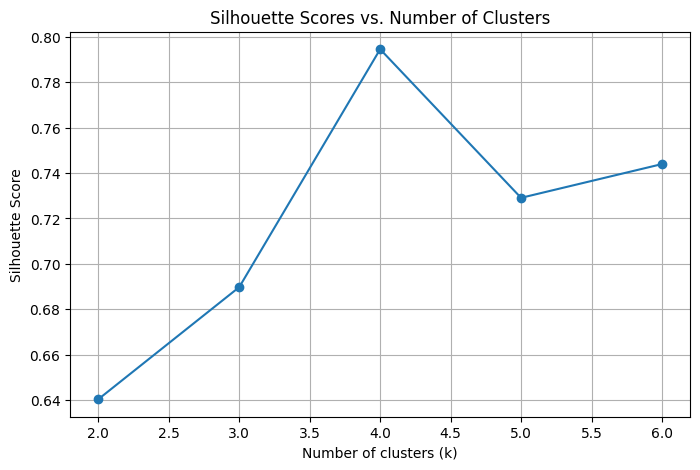

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#load data
df = pd.read_csv('/content/aircraft_performance.csv')
X = df[['Speed_kmh', 'FuelFlow_kgph']]

#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_models = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    kmeans_models.append(kmeans)


silhouette_scores = []
for model in kmeans_models:
    labels = model.predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

print("Silhouette Scores:")
print(silhouette_scores)
print()

k_values = list(range(2, 7))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.grid(True)
plt.show()

Optimal number of clusters (k): 4



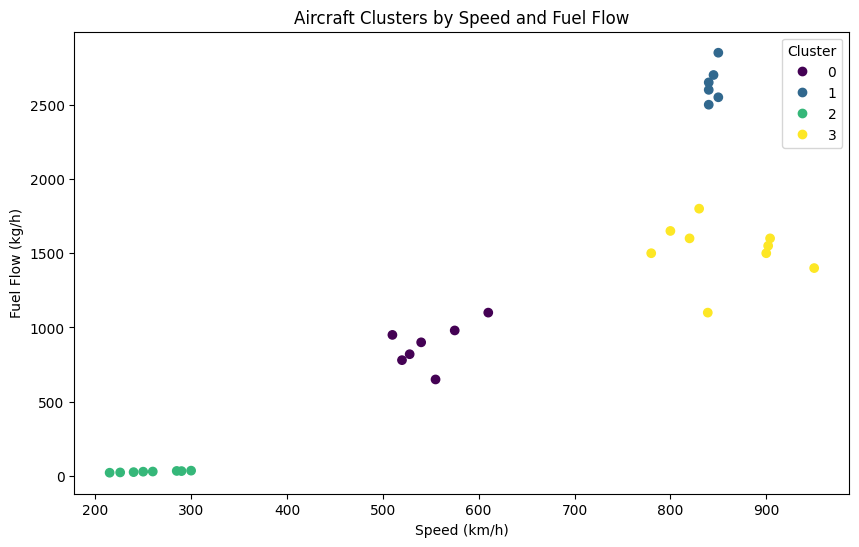

In [2]:
#from silhouette plot, k=4 has the highest score.
optimal_k = 4

optimal_kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
optimal_kmeans_model.fit(X_scaled)

print(f"Optimal number of clusters (k): {optimal_k}")
print()

cluster_labels = optimal_kmeans_model.predict(X_scaled)

df['cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Speed_kmh'], df['FuelFlow_kgph'], c=df['cluster'], cmap='viridis', label=df['cluster'])
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel Flow (kg/h)')
plt.title('Aircraft Clusters by Speed and Fuel Flow')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

Starting from lowest speed:

Cluster 2 (green) shows low speed, low fuel flow aircraft. These are likely small general aviation, piston powered, propeller aircraft. They fly very slowly but also use very litle fuel.

Cluster 0 (purple) shows medium speed, low-medium fuel flow airfraft. These are likely larger general aviation planes with multi-engine and/or turboprop configurations, and smaller comericial turboprop for regional flights. These have engines that fly faster than piston powered propeller aircraft, and also consume slightly more fuel as a result.

Cluster 3 (yellow) shows high speed, medium-high fuel flow aircraft. These are likely smaller jet planes like high-end general aviation jets, private/business jets, or small regional comerical jet aircraft. The jet engines consume more fuel than propeller engines, and also fly significantly faster.

Cluster 1 (blue) shows high speed, high fuel flow aircraft. These are likely large comerical jet planes whose larger engines and heaver weight consume more fuel with little to no increase in speed.

## 2) Implement your own linear machine learning model optimized with minibatch gradient descent method to predict the price of a house in a city with population of 160,000. Vary the batch size from 1,5,10, and 20. Plot the objective function, J for each batch size. You do not need to split the data into train and test set for this problem. What happens when you use batch size equal to one?

In [3]:
import pandas as pd
import numpy as np

# import and arrange data
df = pd.read_csv('/content/housing_prices.txt', header=None, names=['Population', 'Price'])

X = df['Population'].values
X = X.reshape(-1, 1)
X = np.insert(X, 0, 1, axis=1)

y = df['Price'].values
y = y.reshape(-1, 1)

In [4]:
# create mini batch gradient descent


def h(w,X):
    return np.dot(X,w)

def mse(w,X,y):
    m = y.size
    return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))

def minibatch_gradient_descend(X, y, iterations, alpha, batch_size, w_start = np.zeros(2)):
    m = y.size
    w = w_start
    J_values = []
    w_store = []

    for _ in range(iterations):
        temp_w = w

        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        cw = w;

        w_store.append(list(w[:,0]))

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            m_batch = y_batch.size

            for k in range(len(temp_w)):
                temp_w[k] = w[k] - (alpha/m_batch)*np.sum((h(w,X_batch) - y_batch)*np.array(X_batch[:,k]).reshape(m_batch,1))
            w = temp_w

        J_values.append(mse(cw,X_batch,y_batch))

    return w, w_store, J_values

def predict(xval, w):
    return w[0] + w[1]*xval


/tmp/ipython-input-2121232316.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))



 Training with batch size: 1
Price of a house in a city with a population of 160,000: $134909.0

 Training with batch size: 5
Price of a house in a city with a population of 160,000: $129470.0

 Training with batch size: 10
Price of a house in a city with a population of 160,000: $128615.0

 Training with batch size: 20
Price of a house in a city with a population of 160,000: $128171.0


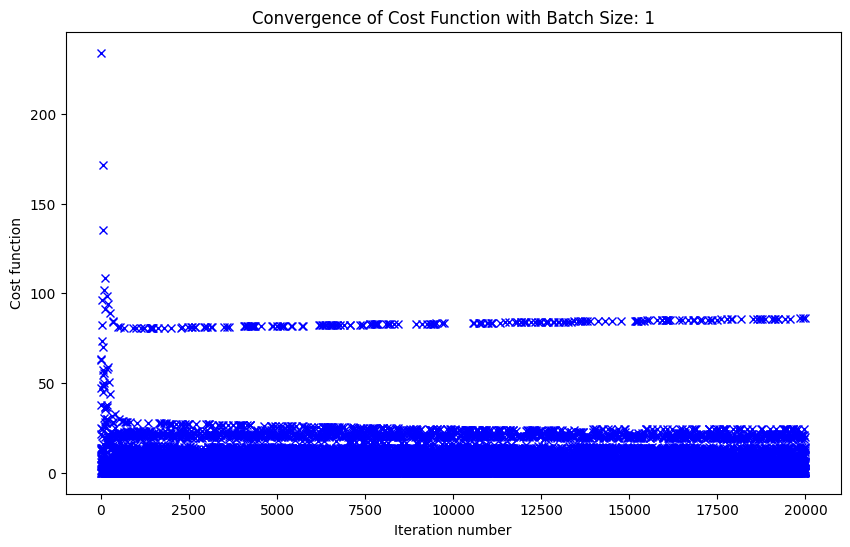

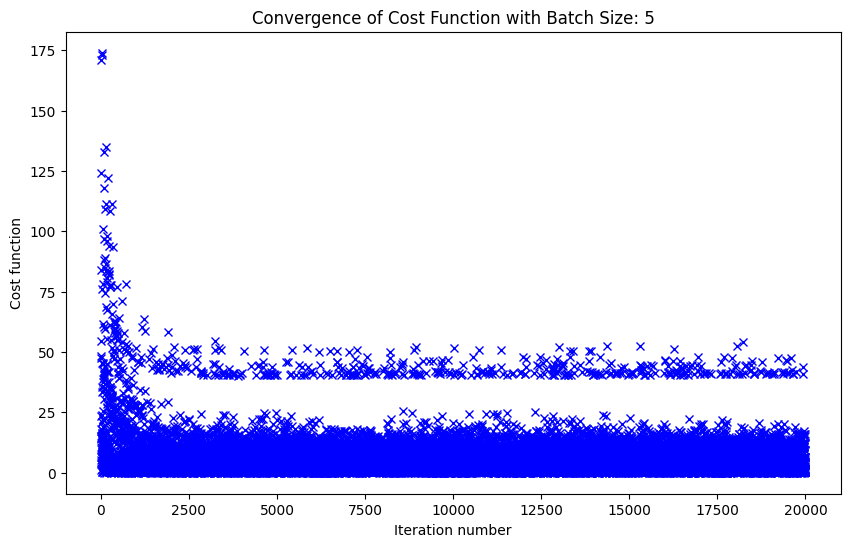

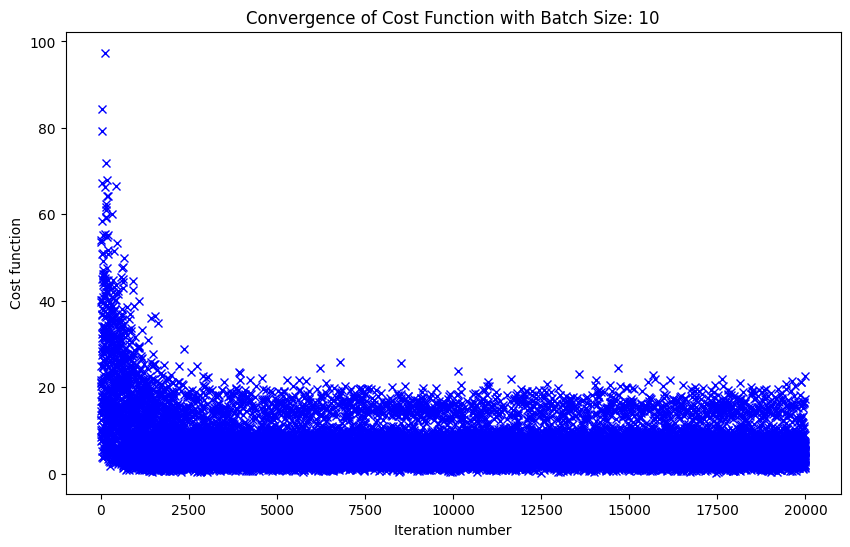

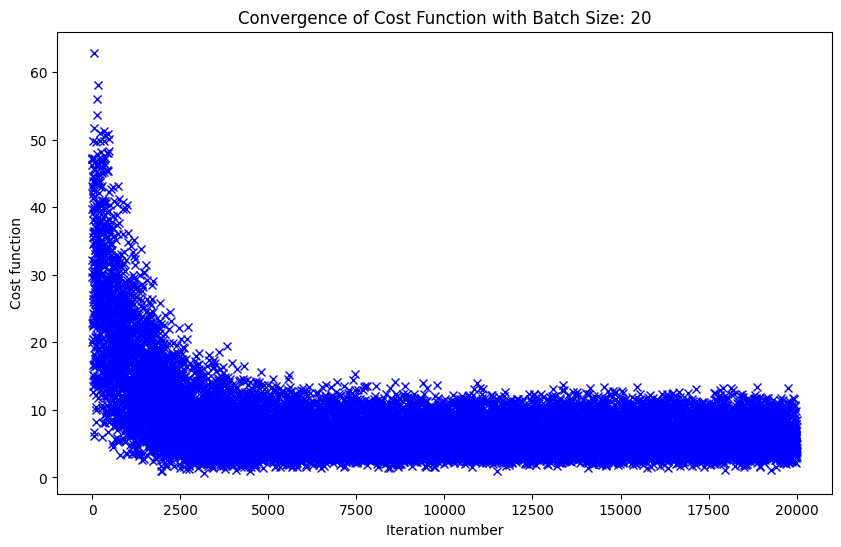

In [5]:
import matplotlib.pyplot as plt

# set iterations and learning rate
iterations = 20000
alpha = 0.000001

batch_sizes = [1, 5, 10, 20]

for batch_size in batch_sizes:
    w_start = np.zeros((X.shape[1],1))
    w, w_store, J_values = minibatch_gradient_descend(X, y, iterations, alpha, batch_size, w_start)

    price = predict(16, w)

    print(f"\n Training with batch size: {batch_size}")
    print(f"Price of a house in a city with a population of 160,000: ${np.round(10000*price[0])}")

    plt.figure(figsize=(10,6))
    plt.plot(range(len(J_values)),J_values,'bx')
    plt.title("Convergence of Cost Function with" + f" Batch Size: {batch_size}")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")

When a batch size of 1 is used multiple horizontal asymptotes show up in the cost function convergence plot. This suggests that several local minima are being found by the algorithm instead of only the global minimum. A similar trend shows up with a batch size of 5.

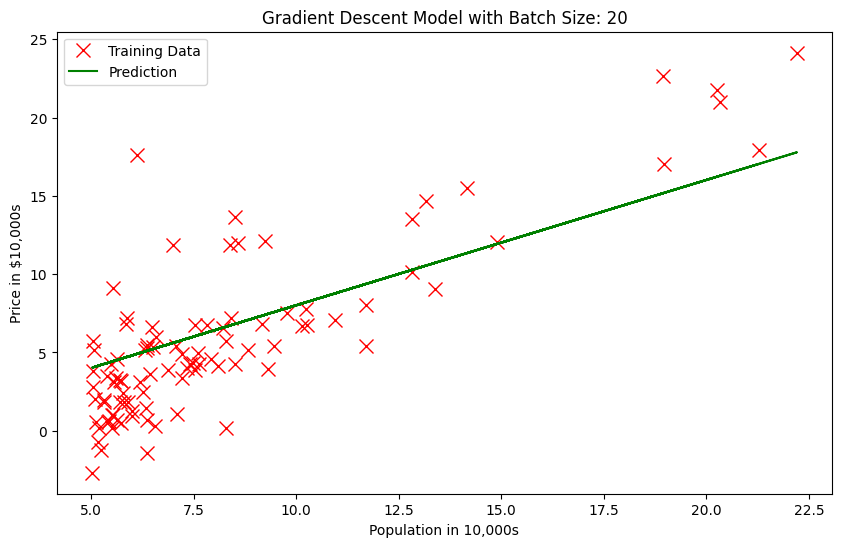

In [6]:
import matplotlib.pyplot as plt

pred = predict(X, w)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y,'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],pred[:,1],'g-',label='Prediction')
plt.title("Gradient Descent Model with Batch Size: " + f"{batch_size}")
plt.xlabel('Population in 10,000s')
plt.ylabel('Price in $10,000s')
plt.legend()
plt.show()

## 3) Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression model to classify breast cancers. You must recursively eliminate features to find the best two features to perform the classification. Evaluate the model using various classification metrics and report your findings. Use a 70%-30% split.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load data
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# split data 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=5000)

# recursively find 2 best features
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X_train, y_train)

selected_features_mask = rfe.support_
X_rfe = X[:, selected_features_mask]
X_train_rfe = X_train[:, selected_features_mask]
X_test_rfe = X_test[:, selected_features_mask]

selected_feature_names = (cancer_data.feature_names[selected_features_mask])
print("Selected features:", selected_feature_names)

# train on best features
model.fit(X_train_rfe, y_train)

y_pred = model.predict(X_test_rfe)

Selected features: ['worst concavity' 'worst concave points']


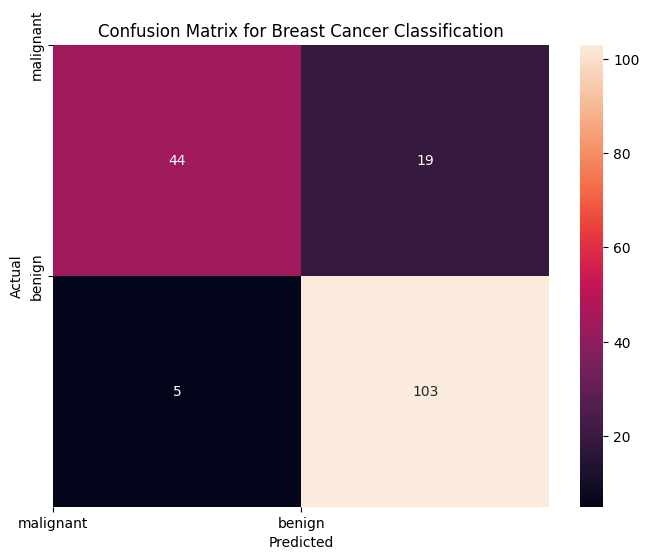


Accuracy: 0.8596491228070176
Precision: 0.8442622950819673
Recall: 0.9537037037037037
F1-score: 0.8956521739130435


In [8]:
# report findings
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Breast Cancer Classification')
plt.xticks(ticks=np.arange(len(cancer_data.target_names)), labels=cancer_data.target_names)
plt.yticks(ticks=np.arange(len(cancer_data.target_names)), labels=cancer_data.target_names)
plt.show()

print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Recursive Feature Elimination (RFE) with a logistic regression model selected 'mean concavity' and 'worst concavity' as the two most important features for classifying breast cancer data. The model achieved an accuracy of approximately 86%. The model's recall of approximately 95% indicates its effectiveness in identifying positive cases (malignant tumors). The confusion matrix showed 44 True Negatives, 19 False Positives, 5 False Negatives, and 103 True Positives.


## 4) Construct a neural network with a single hidden layer containing two neurons using Tensorflow. Use ReLU as activation function. Optimize the network with stochastic gradient descent method. Choose mean squared error to calculate the loss. Fit the housing prices dataset using the network. Use the trained neural network model to predict the price of a house in a city with population of 165,000. Calculate a useful regression metric. Plot the training and validation losses. Use a 70%-30% split for the training and validation dataset. The architecture of the neural network and the optimizer are fixed for this problem. Therefore, you need to choose a suitable learning rate and number of epochs to minimize the loss. Explain the trends you found in the plots for training and validation losses.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import pandas as pd

# load data, split into 70-30, and scale
df = pd.read_csv('/content/housing_prices.txt', header=None, names=['Population', 'Price'])

X = df['Population'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


# create NN with 1 hidden layer, 2 neurons, and ReLU activation
model = Sequential([
    Dense(2, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Use scaled shape
    Dense(1)])

# optimize with SGD and MSE for error
model.compile(optimizer=SGD(), loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Learning Rate: 0.1, Epochs: 50
Training with Learning Rate: 0.1, Epochs: 100
Training with Learning Rate: 0.1, Epochs: 200
Training with Learning Rate: 0.01, Epochs: 50
Training with Learning Rate: 0.01, Epochs: 100
Training with Learning Rate: 0.01, Epochs: 200
Training with Learning Rate: 0.001, Epochs: 50
Training with Learning Rate: 0.001, Epochs: 100
Training with Learning Rate: 0.001, Epochs: 200


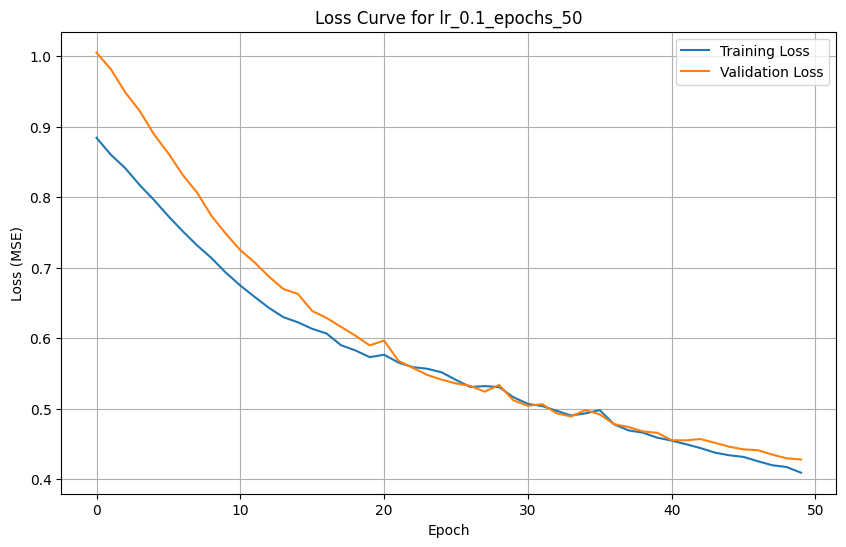

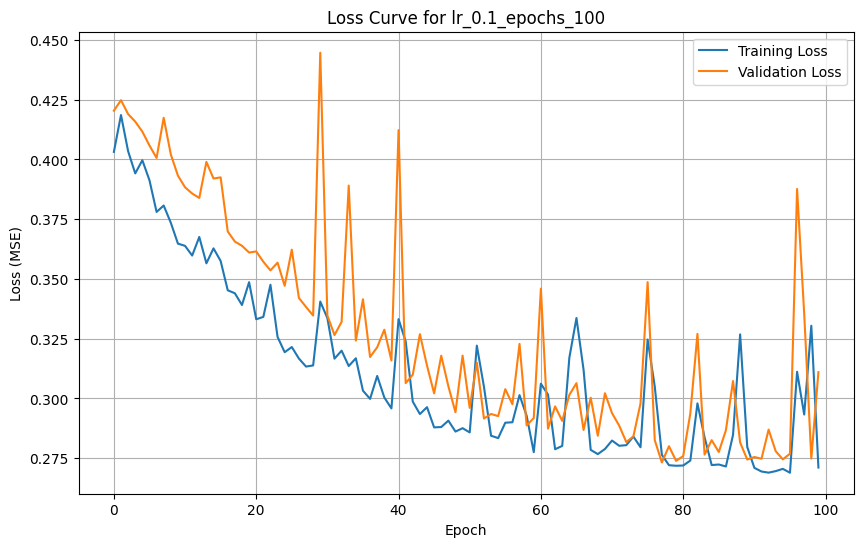

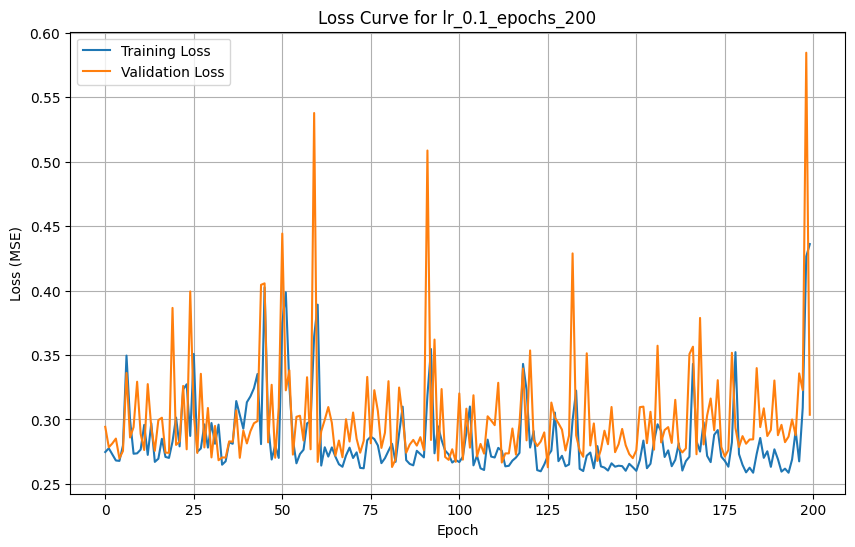

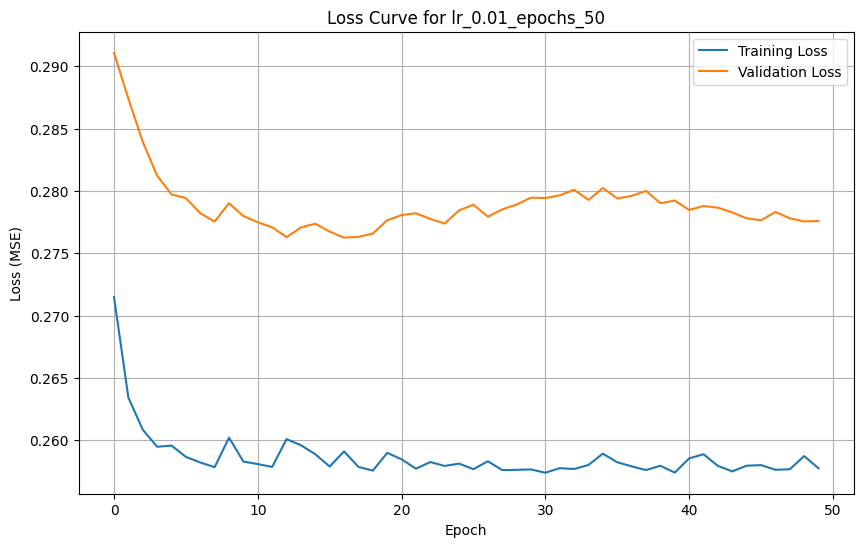

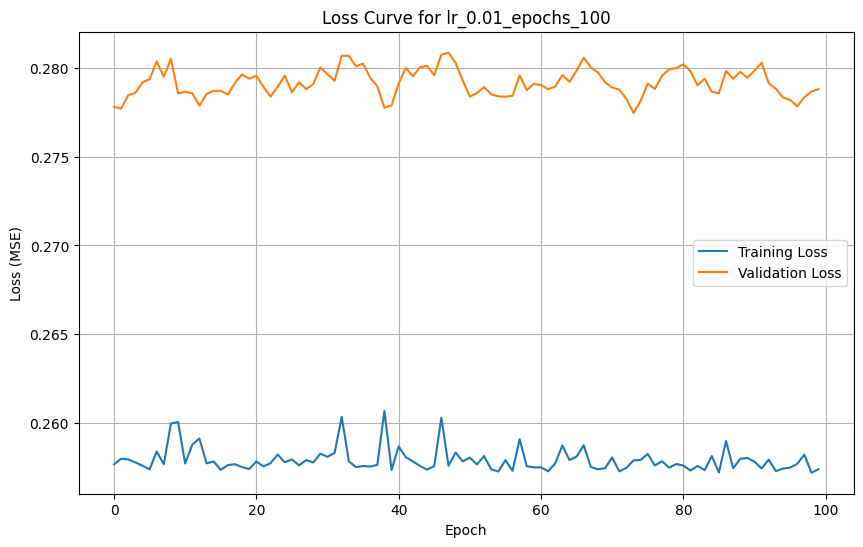

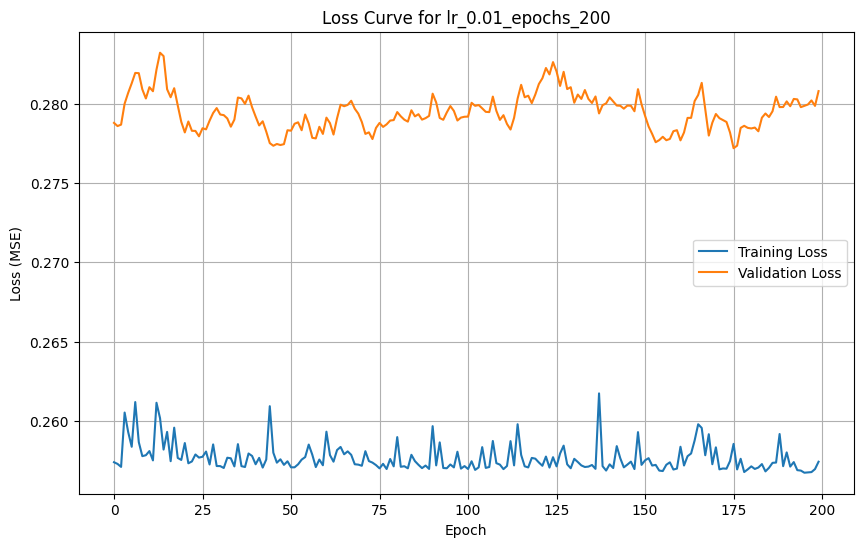

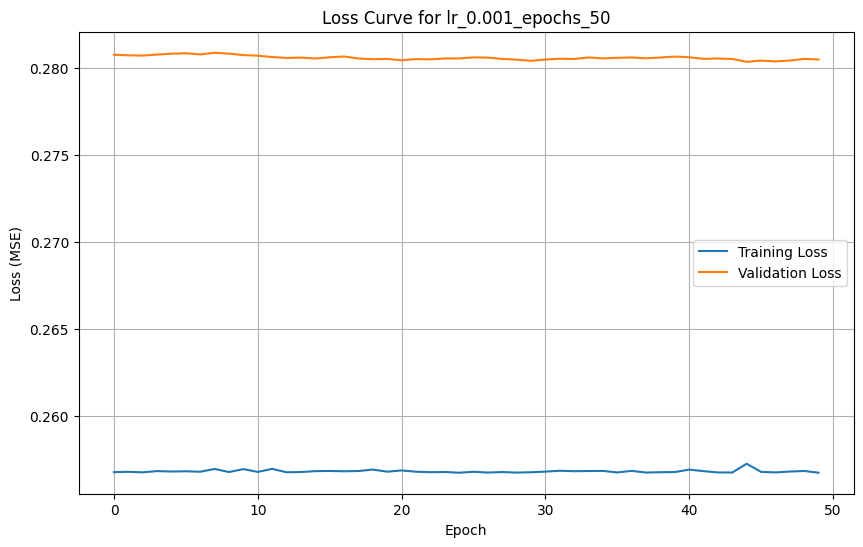

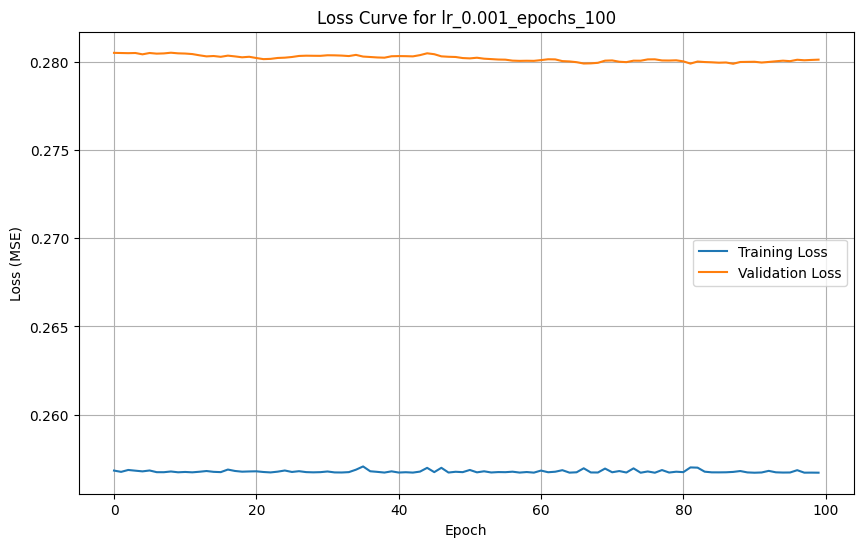

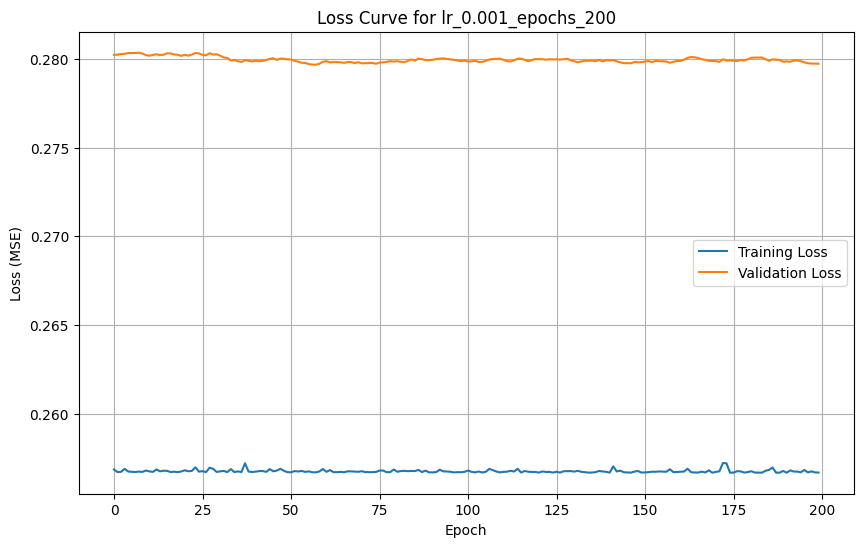

In [10]:
# plot learning rate and epoch to select best
learning_rates = [0.1, 0.01, 0.001]
epochs = [50, 100, 200]

history = {}

for lr in learning_rates:
    for ep in epochs:
        print(f"Training with Learning Rate: {lr}, Epochs: {ep}")
        model.compile(optimizer=SGD(learning_rate=lr), loss='mse')
        history[f'lr_{lr}_epochs_{ep}'] = model.fit(X_train_scaled, y_train_scaled,
                                                    epochs=ep, validation_split=0.2, verbose=0)

for key, hist in history.items():
    plt.figure(figsize=(10, 6))
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve for {key}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
# chosen learning rate and epochs
learning_rate_final = 0.001
epochs_final = 100

model.compile(optimizer=SGD(learning_rate=learning_rate_final), loss='mse')

history_final = model.fit(X_train_scaled, y_train_scaled,
                          epochs=epochs_final, validation_data=(X_test_scaled, y_test_scaled),
                          verbose=0)

In [12]:
import numpy as np

# predict cost with population of 165000
population_to_predict = 16.5

population_to_predict_reshaped = np.array([[population_to_predict]])
population_to_predict_scaled = scaler_X.transform(population_to_predict_reshaped)
predicted_price_scaled = model.predict(population_to_predict_scaled)

# unscale predicted price
predicted_price = scaler_y.inverse_transform(predicted_price_scaled)
predicted_price_dollars = predicted_price[0][0] * 10000

print(f"Predicted price of a house in a city with a population of 165,000: ${predicted_price_dollars:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted price of a house in a city with a population of 165,000: $162217.34


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate r squared score

y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error on the test set: {mse:.2f}")
print(f"R-squared score on the test set: {r2:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Mean Squared Error on the test set: 11.04
R-squared score on the test set: 0.60


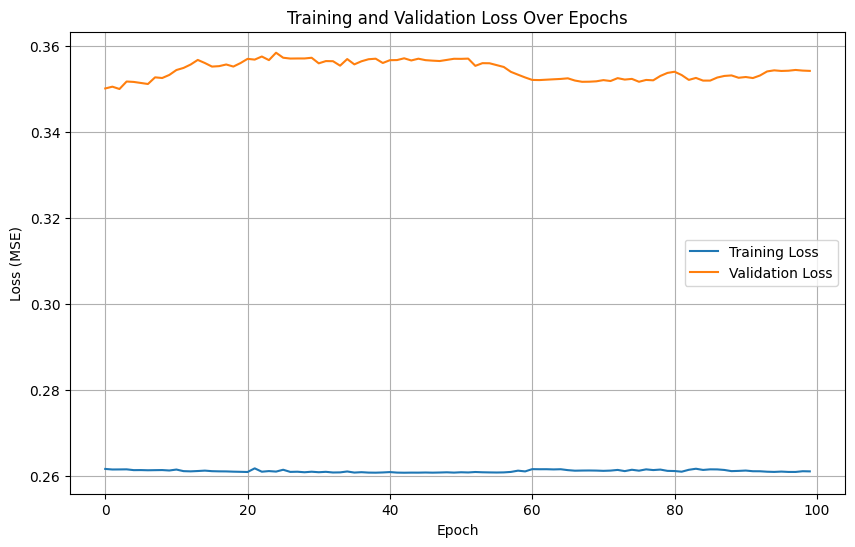

In [14]:
import matplotlib.pyplot as plt

# plot final loss plot

plt.figure(figsize=(10, 6))
plt.plot(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

The training and validation loss plots showed a decrease in loss over epochs, indicating that the model was learning, and the validation loss tracked the training loss reasonably well, suggesting no severe overfitting within the 200 epochs. At first, with low learning rate and epoch count, the loss plots showed a sharp decrease as the iterations increased. As the learning rate was reduced, the loss plots became more constant over the iterations, starting and staying at the asymptote achieved in the higher learning rate plot. By trying different learning rates and epochs, a learning rate of 0.001 and 100 epochs were determined to be suitable for training, showing good convergence while maintaining good computational efficiency.

On the test set, the model achieved a Mean Squared Error of 10.94 and an R-squared score of 0.60. The R-squared score of 0.60 indicates that the model explains 60% of the variance in house prices, suggesting that while the model captures some relationship, other factors likely influence housing prices.
